In [3]:
pip install gekko

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 3.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
from gekko import GEKKO

In [153]:
from scipy.optimize import linprog
c = [-100, -125] # Change objective function to Minimisation 
A = [[3, 6], [8, 4]]
b = [30, 44]
bound = (0, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[bound, bound], method='highs') # Same signage of less than 


#print solution
print(f'Optimal solution: G = {res.x[0]:.2f}, H = {res.x[1]:.2f}')
print(f'Maximum profit = $ {-res.fun:.2f}')

Optimal solution: G = 4.00, H = 3.00
Maximum profit = $ 775.00


In [11]:
from gekko import GEKKO
m = GEKKO()
G,H = m.Array(m.Var,2,lb=0)
m.Maximize(100*G+125*H)
m.Equation(3*G+6*H<=30)
m.Equation(8*G+4*H<=44)
m.solve(disp=False)

#print solution
print(f'Optimal solution: G = {G.value[0]:.2f}, H = {H.value[0]:.2f}')
print(f'Maximum profit = $ {-m.options.objfcnval:.2f}')

Optimal solution: G = 4.00, H = 3.00
Maximum profit = $ 775.00


In [10]:
from scipy.optimize import linprog
c = [-3000, -5000]
A = [[1, 0], [0, 2],[3, 2]]
b = [4, 12, 18 ]
bound = (0, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[bound, bound], method='highs') # Same signage of less than 

#print solution
print(f'Optimal solution: Doors = {res.x[0]:.2f}, Windows = {res.x[1]:.2f}')
print(f'Maximum profit = $ {-res.fun:.2f}')

Optimal solution: Doors = 2.00, Windows = 6.00
Maximum profit = $ 36000.00


In [14]:
from gekko import GEKKO
m = GEKKO()
D,W = m.Array(m.Var,2,lb=0)
m.Maximize(3000*D+5000*W)
m.Equation(1*D<=4)
m.Equation(2*W<=12)
m.Equation(3*D+2*W<=18)
m.solve(disp=False)

#print solution
print(f'Optimal solution: D = {D.value[0]:.2f}, W = {W.value[0]:.2f}')
print(f'Maximum profit = $ {-m.options.objfcnval:.2f}')

Optimal solution: D = 2.00, W = 6.00
Maximum profit = $ 36000.00


In [6]:
#solve LP
m = GEKKO(remote=False)
x,y = m.Array(m.Var,2,lb=0)
m.Equations([6*x+4*y<=24,x+2*y<=6,-x+y<=1,y<=2])
m.Maximize(x+y)
m.solve(disp=False)
xopt = x.value[0]; yopt = y.value[0]
print('x:', xopt,'y:', yopt,'obj:',-m.options.objfcnval)

x: 3.0 y: 1.5 obj: 4.5


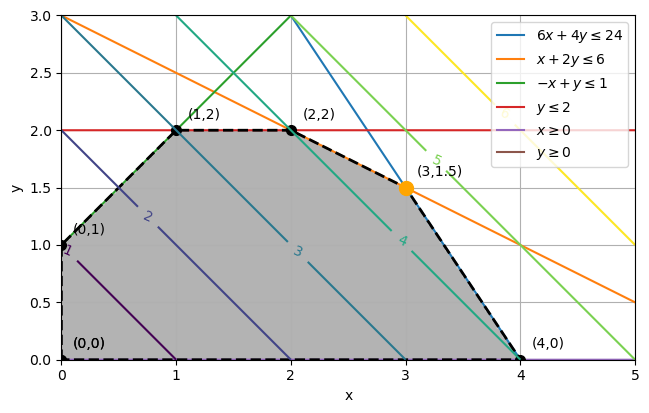

In [7]:
import numpy as np
import matplotlib.pyplot as plt
#visualize solution
g = np.linspace(0,5,200)
x,y = np.meshgrid(g,g)
obj = x+y
plt.imshow(((6*x+4*y<=24)&(x+2*y<=6)&(-x+y<=1)&(y<=2)&(x>=0)&(y>=0)).astype(int), 
    extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',cmap='Greys',alpha=0.3);
#plot constraints
x0 = np.linspace(0, 5, 2000)
y0 = 6-1.5*x0   # 6*x+4*y<=24
y1 = 3-0.5*x0   # x+2*y<=6
y2 = 1+x0       # -x+y<=1
y3 = (x0*0) + 2 # y <= 2
y4 = x0*0       # x >= 0
plt.plot(x0, y0, label=r'$6x+4y\leq24$')
plt.plot(x0, y1, label=r'$x+2y\leq6$')
plt.plot(x0, y2, label=r'$-x+y\leq1$')
plt.plot(x0, 2*np.ones_like(x0), label=r'$y\leq2$')
plt.plot(x0, y4, label=r'$x\geq0$')
plt.plot([0,0],[0,3], label=r'$y\geq0$')
xv = [0,0,1,2,3,4,0]; yv = [0,1,2,2,1.5,0,0]
plt.plot(xv,yv,'ko--',markersize=7,linewidth=2)
for i in range(len(xv)):
    plt.text(xv[i]+0.1,yv[i]+0.1,f'({xv[i]},{yv[i]})')
#objective contours
CS = plt.contour(x,y,obj,np.arange(1,7))
plt.clabel(CS, inline=1, fontsize=10)
#optimal point
plt.plot([xopt],[yopt],marker='o',color='orange',markersize=10)
plt.xlim(0,5); plt.ylim(0,3); plt.grid(); plt.tight_layout()
plt.legend(loc=1); plt.xlabel('x'); plt.ylabel('y')
plt.show()


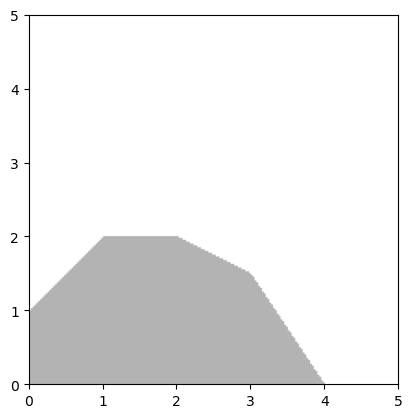

In [22]:
import numpy as np
import matplotlib.pyplot as plt
#visualize solution
g = np.linspace(0,5,200)
x,y = np.meshgrid(g,g)
obj = x+y
plt.imshow(((6*x+4*y<=24)&(x+2*y<=6)&(-x+y<=1)&(y<=2)&(x>=0)&(y>=0)).astype(int), 
    extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',cmap='Greys',alpha=0.3);

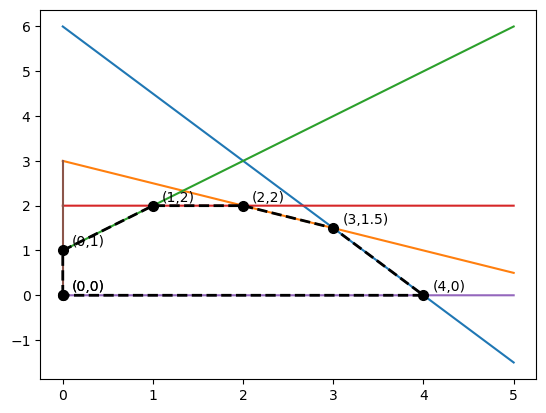

In [84]:
#plot constraints
x0 = np.linspace(0, 5, 2000)
y0 = 6-1.5*x0   # 6*x+4*y<=24
y1 = 3-0.5*x0   # x+2*y<=6
y2 = 1+x0       # -x+y<=1
y3 = (x0*2)     # y <= 2
y4 = x0*0       # x >= 0
plt.plot(x0, y0, label=r'$6x+4y\leq24$')
plt.plot(x0, y1, label=r'$x+2y\leq6$')
plt.plot(x0, y2, label=r'$-x+y\leq1$')
plt.plot(x0, 2*np.ones_like(x0), label=r'$y\leq2$')
plt.plot(x0, y4, label=r'$x\geq0$')
plt.plot([0,0],[0,3], label=r'$y\geq0$')
xv = [0,0,1,2,3,4,0]; yv = [0,1,2,2,1.5,0,0]
plt.plot(xv,yv,'ko--',markersize=7,linewidth=2)
for i in range(len(xv)):
    plt.text(xv[i]+0.1,yv[i]+0.1,f'({xv[i]},{yv[i]})')


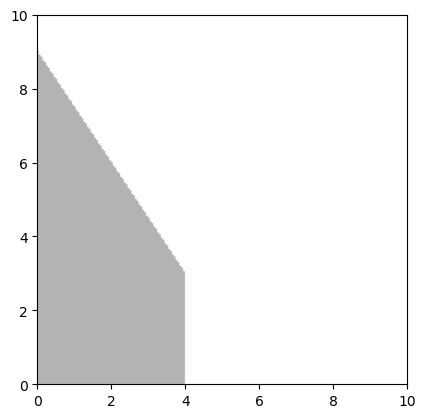

In [65]:
import numpy as np
import matplotlib.pyplot as plt
#visualize solution
g = np.linspace(0,10,200)
x,y = np.meshgrid(g,g)
obj = 3*x+5*y
plt.imshow(((x<=4)&(y<=12)&(3*x+2*y<=18)).astype(int), 
    extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',cmap='Greys',alpha=0.3);

In [70]:
from gekko import GEKKO
m = GEKKO()
x1,x2 = m.Array(m.Var,2,lb=0)
m.Maximize(3*x1+5*x2)
m.Equation(x1<=4)
m.Equation(2*x2<=12)
m.Equation(3*x1+2*x2<=18)
m.solve(disp=False)

#print solution
print(f'Optimal solution: x1 = {x1.value[0]:.2f}, x2 = {x2.value[0]:.2f}')
print(f'Maximum profit = $ {-m.options.objfcnval:.2f}')

Optimal solution: x1 = 2.00, x2 = 6.00
Maximum profit = $ 36.00


ValueError: x and y must have same first dimension, but have shapes (2000,) and (1,)

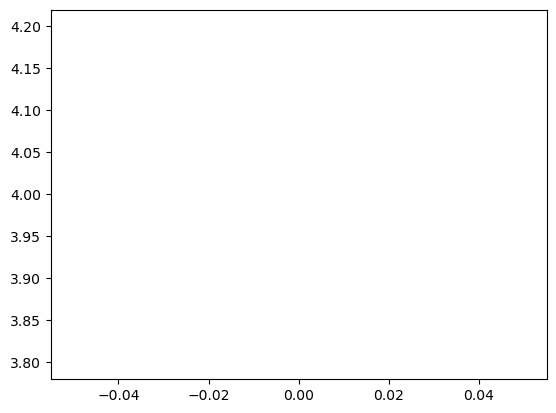

In [188]:
#plot constraints
x1 = np.linspace(0, 5, 2000)
x2 = 4 
x1*0 == -x2+6
x4 = (2*y0 + 18)/3 
plt.plot(0, x2, label=r'$x\leq4$')
plt.plot(x1, x3, label=r'$2y\leq12$')
plt.plot(x1, x4, label=r'$3x+2y\leq18$')
plt.plot([0,0],[4,0], label=r'$y\geq0$')
xv = [0,0,4,4]; yv = [0,9,3,0]
plt.plot(xv,yv,'ko--',markersize=7,linewidth=2)
for i in range(len(xv)):
    plt.text(xv[i]+0.1,yv[i]+0.1,f'({xv[i]},{yv[i]})')


In [159]:
from gekko import GEKKO
m = GEKKO()
x,y = m.Array(m.Var,2,lb=0)
m.Maximize(16*x-6*y)
m.Equation(y>=2)
m.Equation(4*x + y>=10)
m.Equation(8*x-3*y<=42)
m.Equation(-1*x-2*y<=11)
m.solve(disp=False)

#print solution
print(f'Optimal solution: x = {D.value[0]:.2f}, y = {W.value[0]:.2f}')
print(f'Maximum profit = $ {-m.options.objfcnval:.2f}')

Optimal solution: x = 2.00, y = 6.00
Maximum profit = $ 84.00
